In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

pd.set_option('display.max_rows', 210)
pd.set_option('display.max_columns', 210)

sns.set()

In [2]:
data_excel = "C:/Users/jongo/Documents/College/Class/GRIDS/Microtelcos/scripts/BC_collapsed_by_group_detailed.xlsx" 
data = pd.read_excel(data_excel, index_col=0)

local     = data[data['has_local']==1]
not_local = data[data['has_local']==0]

In [3]:
matched_excel = "C:/Users/jongo/Documents/College/Class/GRIDS/Microtelcos/scripts/matched_data_0.xlsx" 
bc_groups     = "C:/Users/jongo/Documents/College/Class/GRIDS/Microtelcos/scripts/BC_collapsed_by_group_detailed.xlsx" 

matched   = pd.read_excel(matched_excel, index_col=0)
matched = matched[['subclass','weights']]

bc_groups = pd.read_excel(bc_groups, index_col=0)

In [4]:
local.columns

Index(['BGpop', 'LAcounty', 'served', 'served25', 'served100', 'served_fib',
       'served_un', 'served_under25', 'served_under100', 'comp', 'comp25',
       'comp100', 'comp_fib', 'comp_un', 'comp_under25', 'comp_under100',
       'max_up', 'max_dn', 'avg_max_up', 'avg_max_dn', 'has_local', 'has_coop',
       'has_private', 'has_muni', 'avg_local', 'avg_coop', 'avg_private',
       'avg_muni', 'local_telco_under_2000', 'local_telco_2000_4999',
       'local_telco_5000_9999', 'local_telco_over_10000', 'isp_count',
       'shrpop10_ui_1', 'shrpop10_ui_2', 'shrpop10_ui_3', 'shrpop10_ui_4',
       'urban_index', 'GEOID', 'NAME', 'COUNTY', 'TRACT', 'BLKGRP',
       'A00001_001', 'A00002_002', 'A00002_003', 'A10003_001', 'A14006_001',
       'A14008_001', 'A10036_001', 'B28002001', 'white', 'black', 'amindian',
       'asian', 'native', 'hispanic', 'laborforce16', 'children', 'unemployed',
       'povertyrate', 'medianage', 'lessHS', 'bachelor_more', 'nointernet',
       'has_pc', 'has_pca

In [5]:
def show_single_plot(col, title, xlabel, bins):
    fig, ax = plt.subplots(1, figsize=(10,8))
    
    local_temp = local[[col]]
    
    n_local     = len(local_temp)
    
    ax.hist(local_temp[col], bins = bins, weights=np.ones(len(local_temp[col])) / len(local_temp[col]), figure=fig)
    
    plt.show()

'has_coop',
'has_private', 
'has_muni', 
'avg_local', 
'avg_coop', 
'avg_private',
'avg_muni', 
'local_telco_under_2000', 
'local_telco_2000_4999',
'local_telco_5000_9999', 
'local_telco_over_10000'
show_single_plot('has_coop', 'Percentage of Block groups that have local ISPs that are Co-ops', )

TypeError: show_single_plot() missing 2 required positional arguments: 'xlabel' and 'bins'

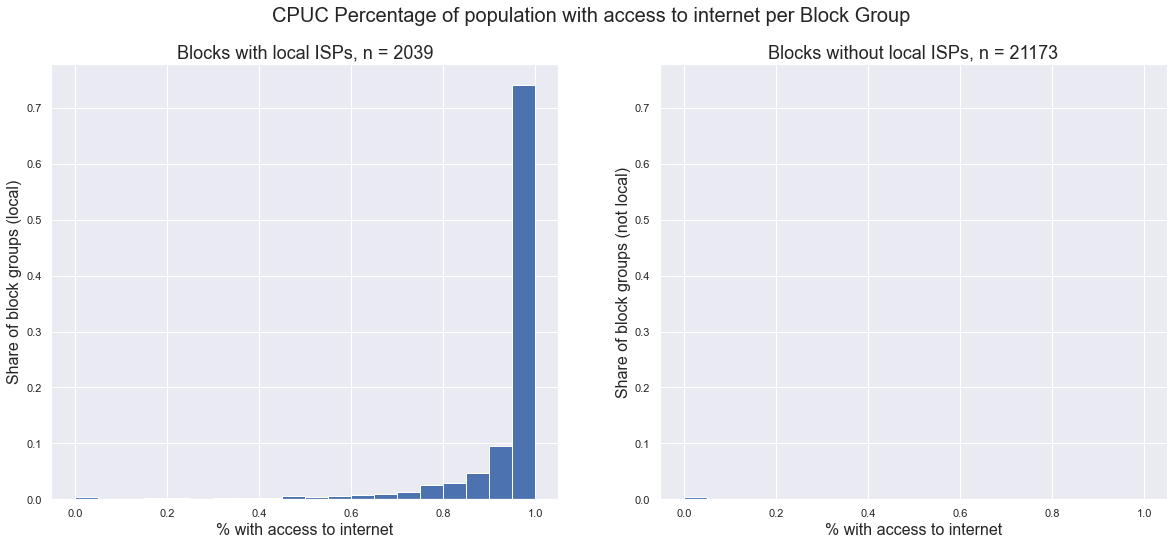

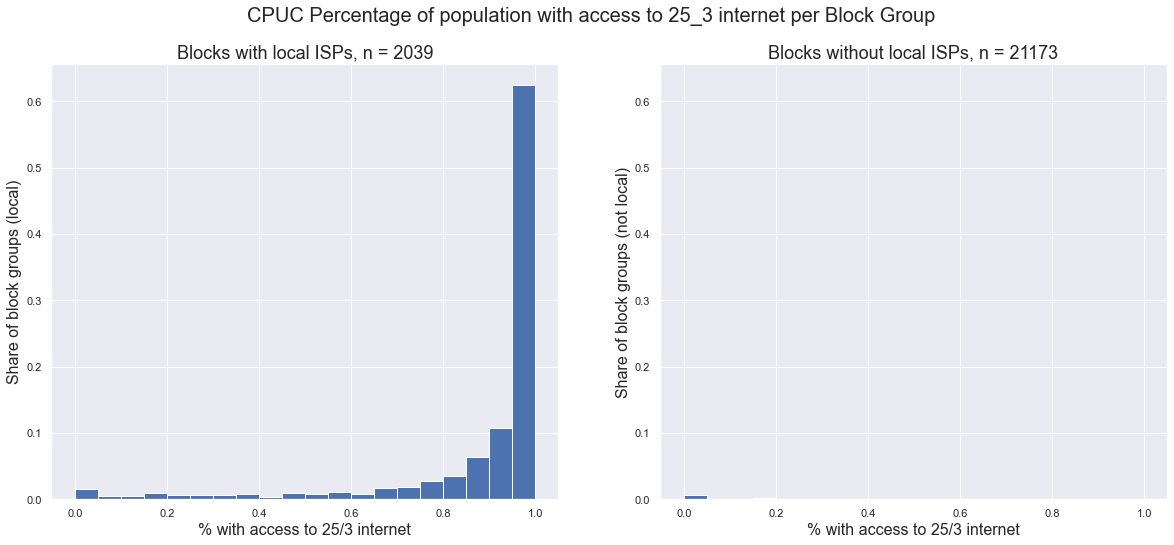

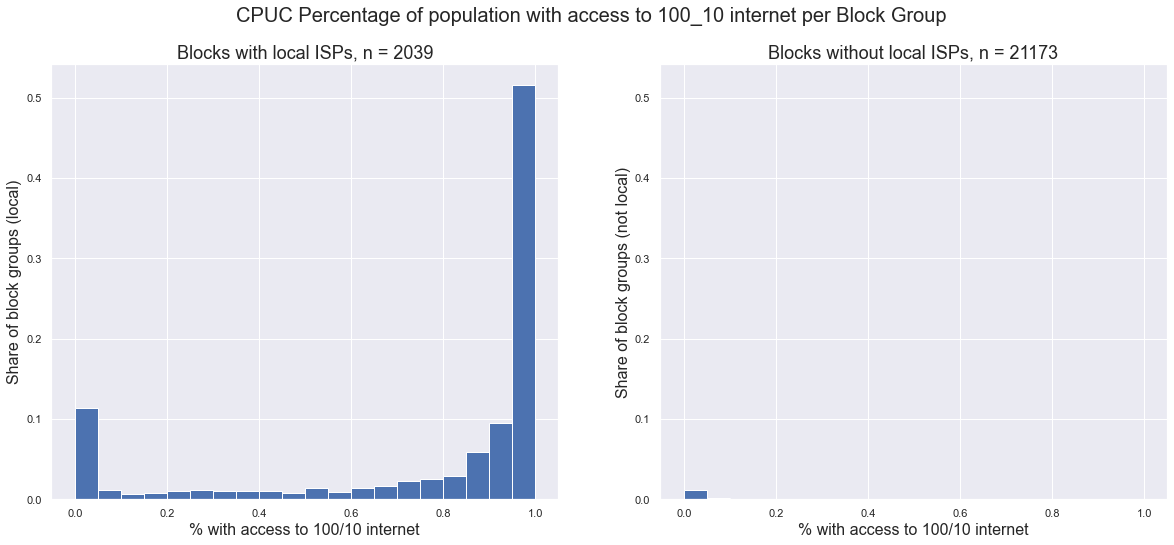

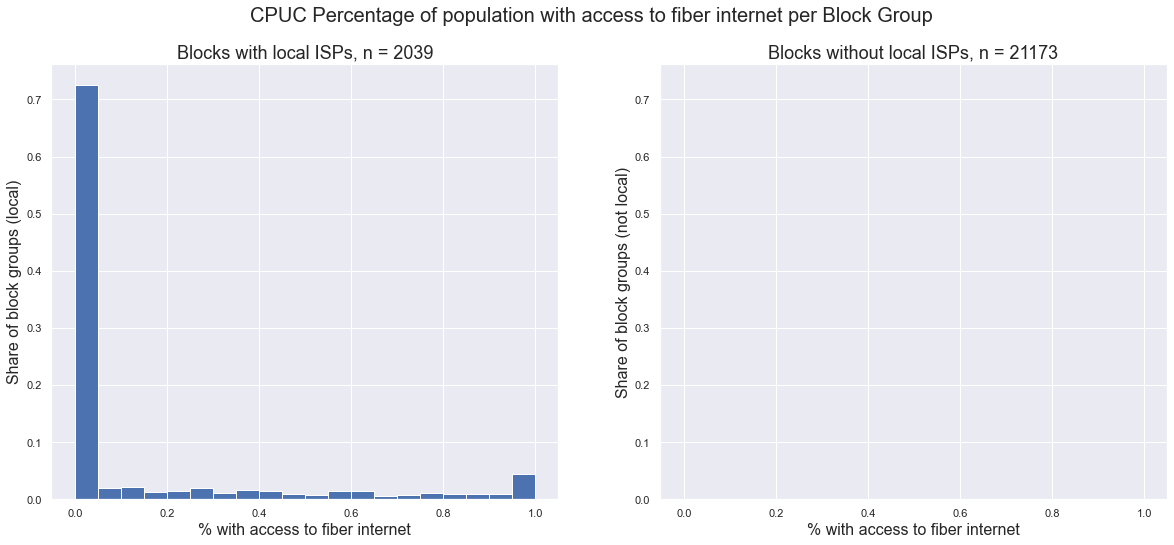

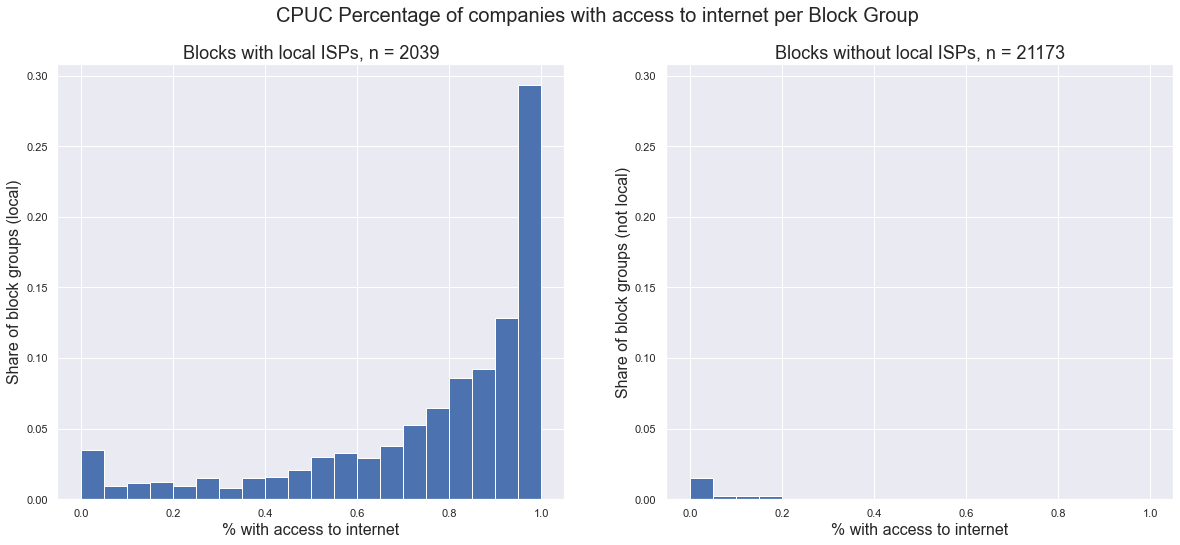

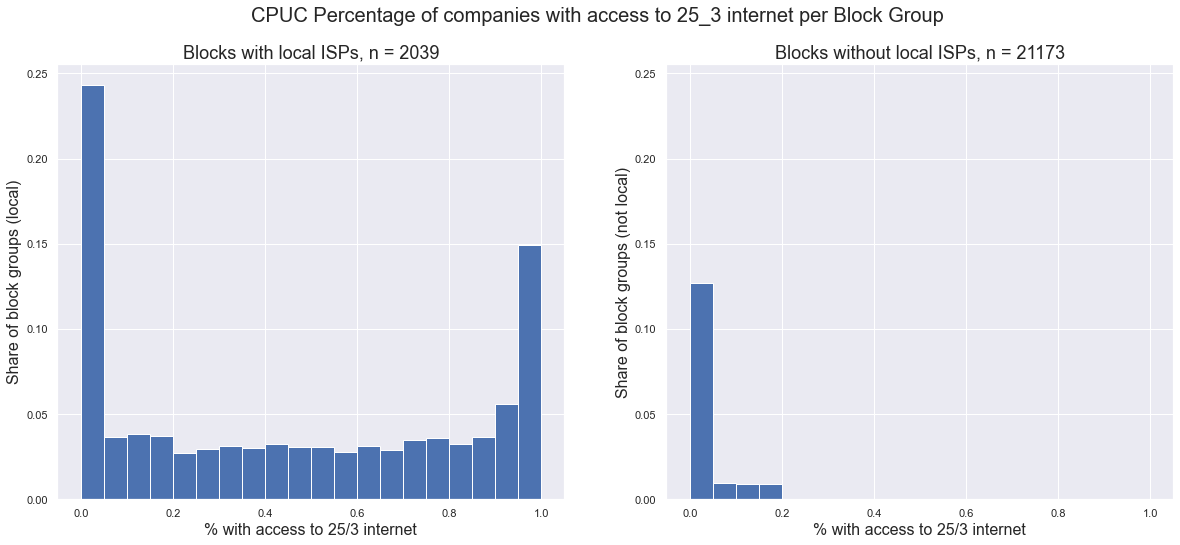

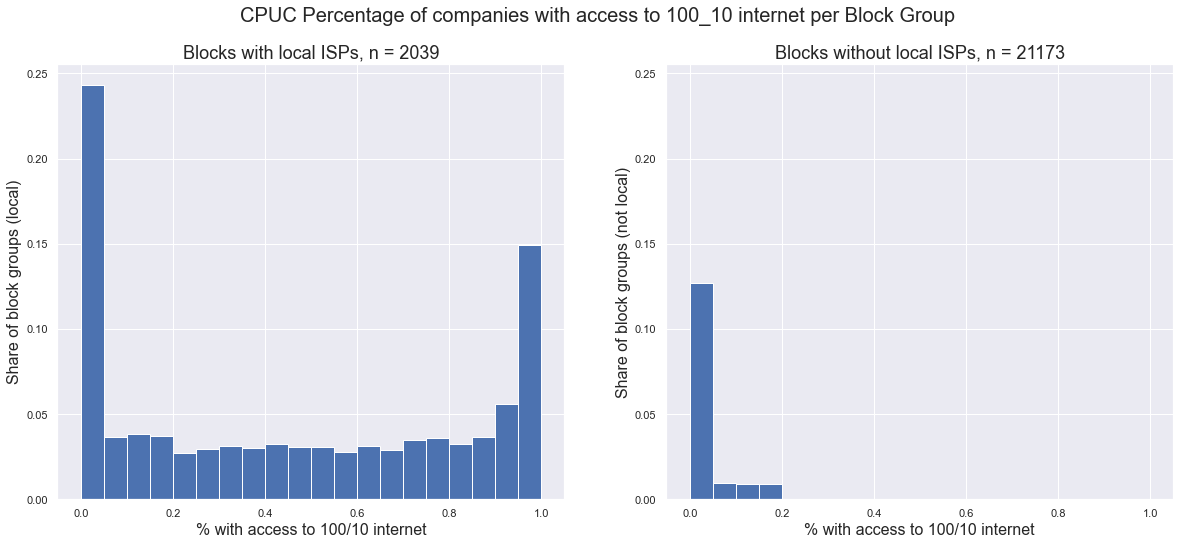

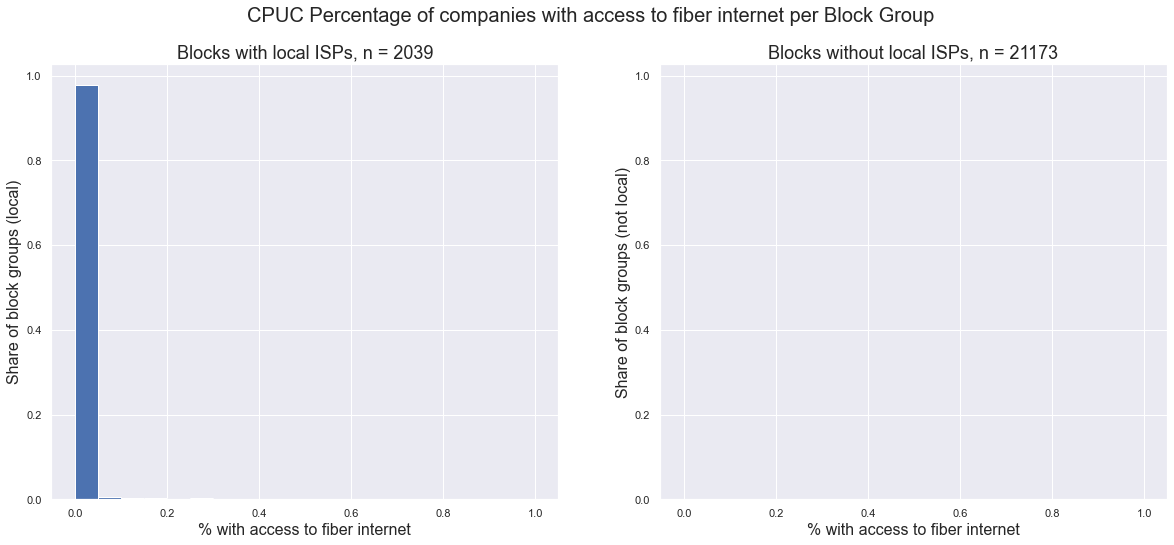

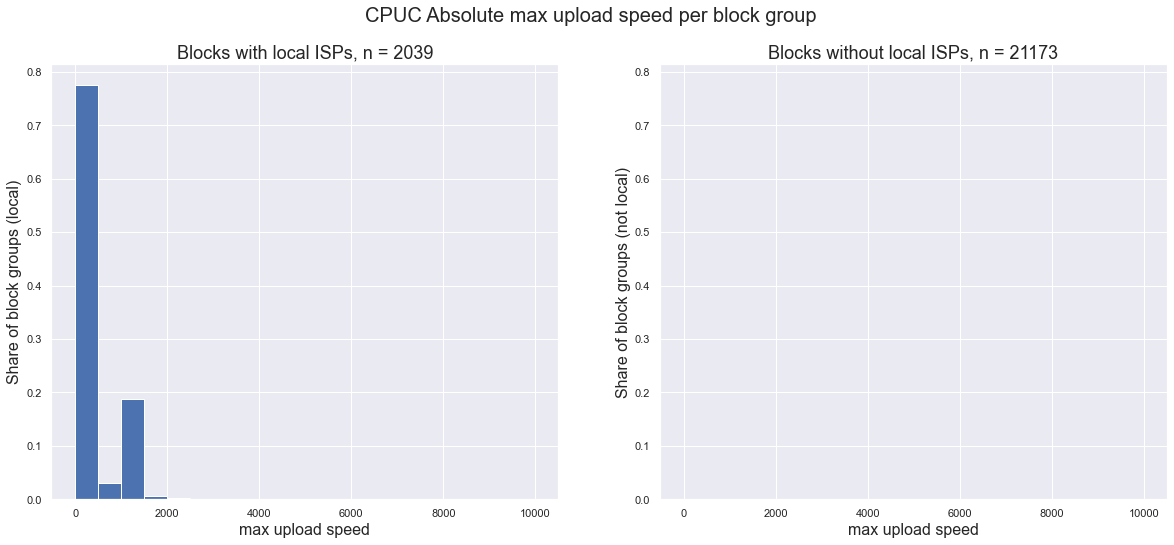

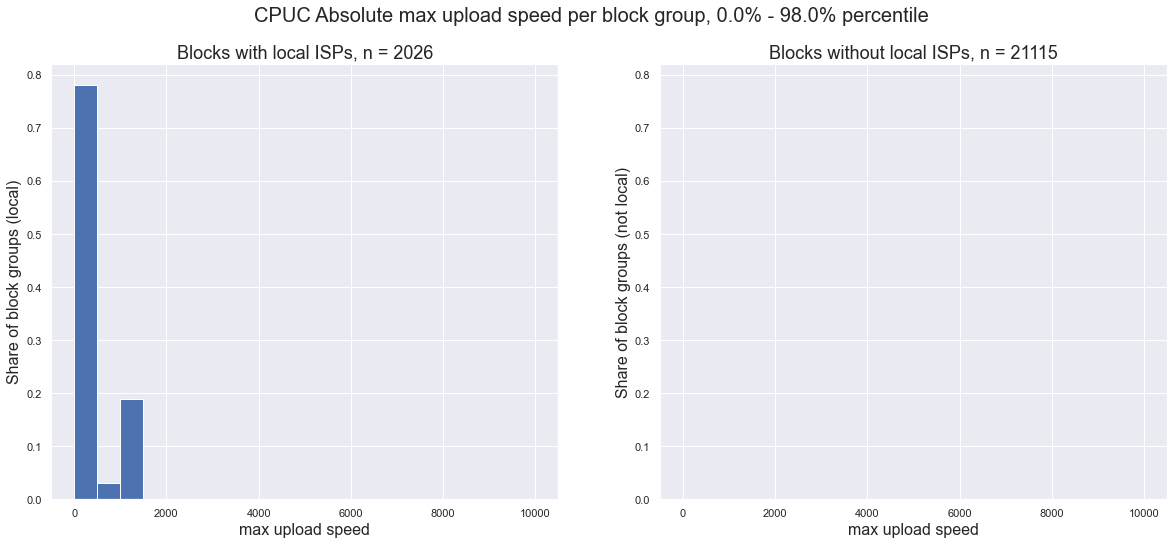

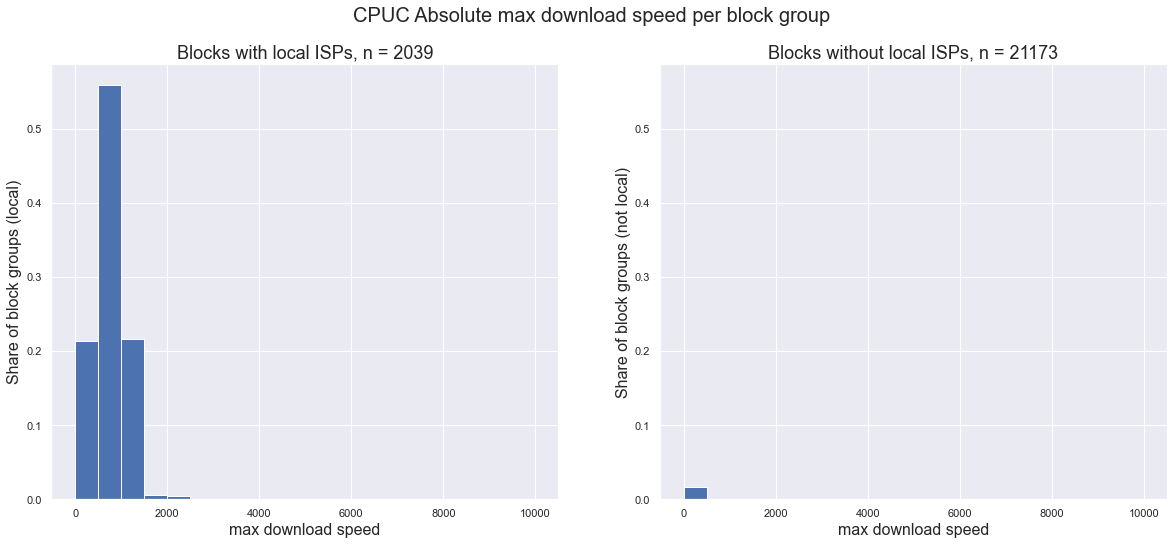

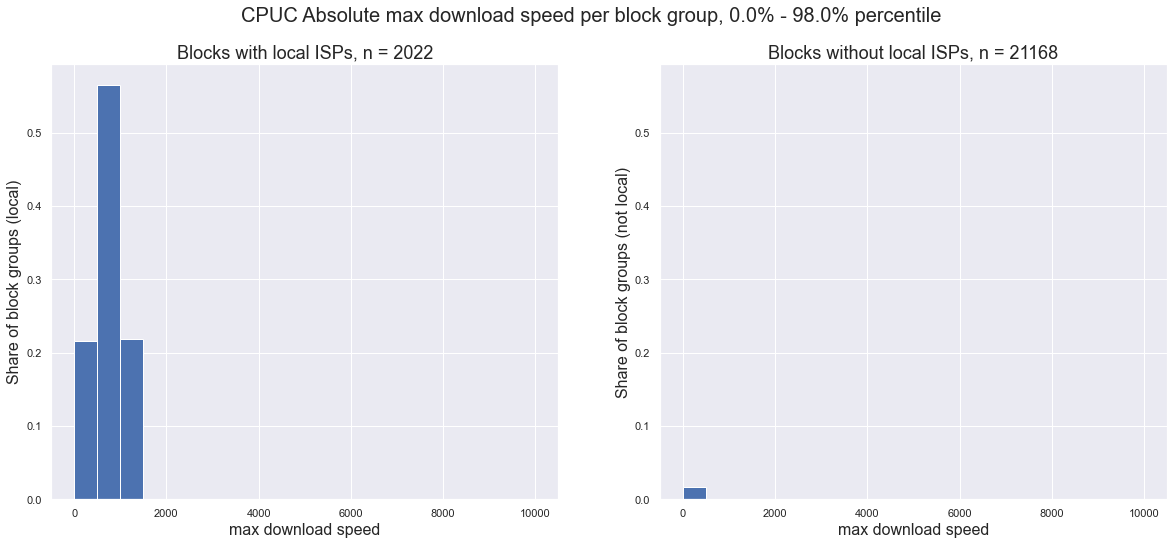

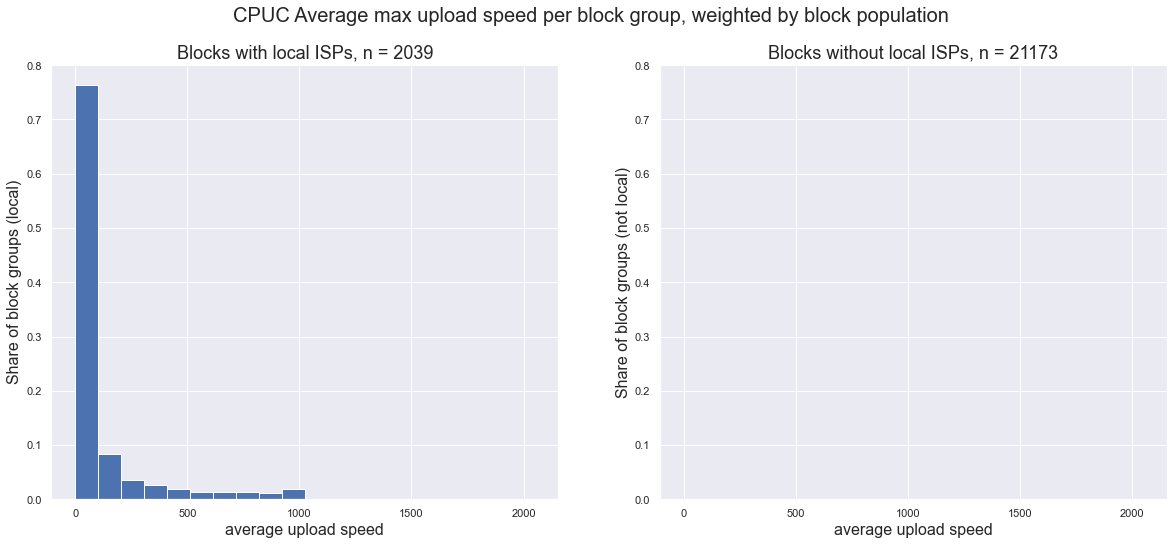

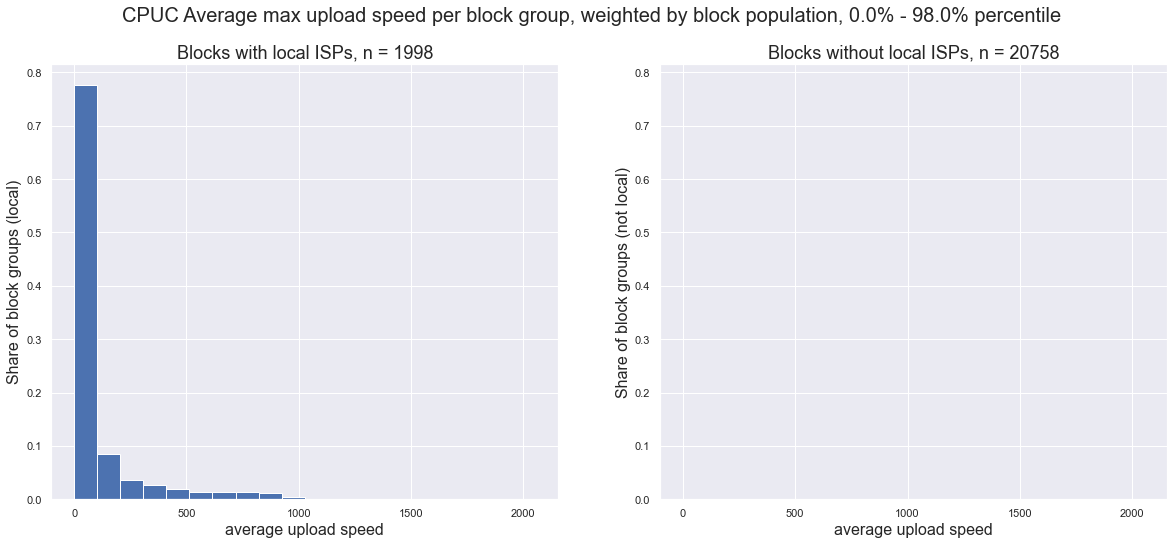

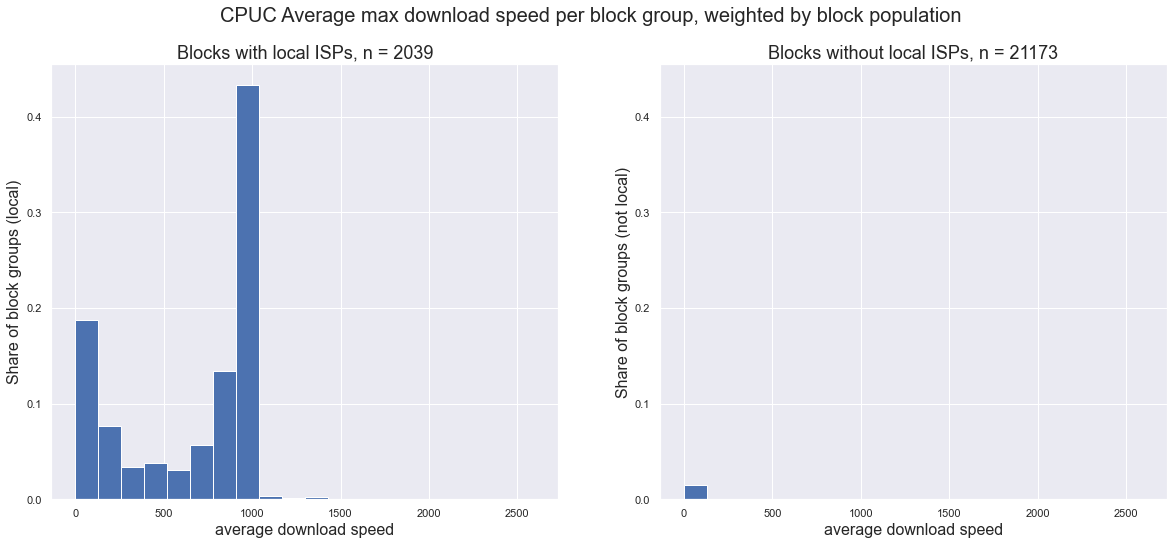

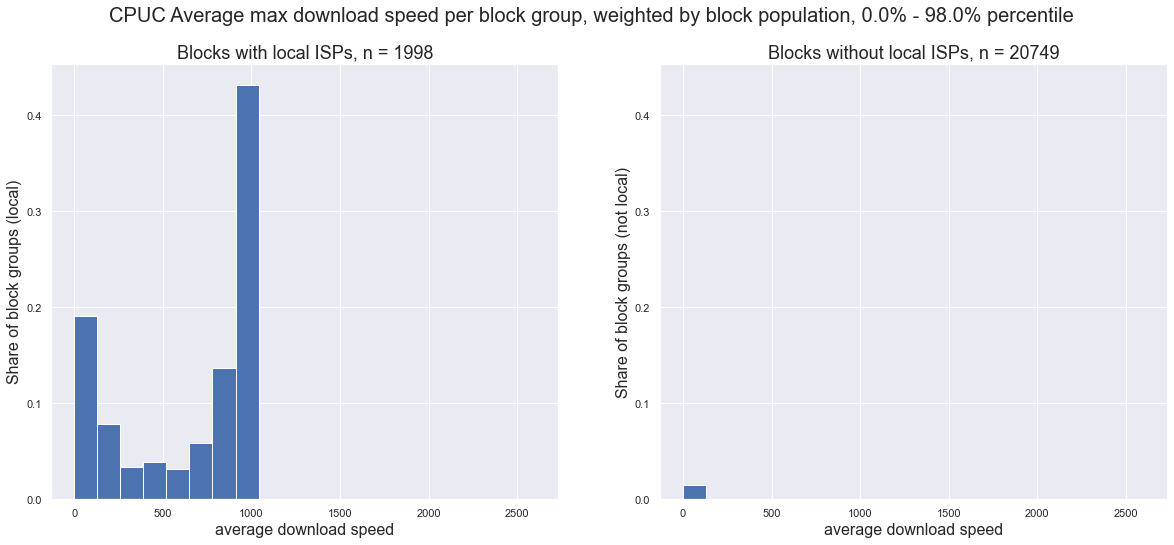

ValueError: autodetected range of [nan, nan] is not finite

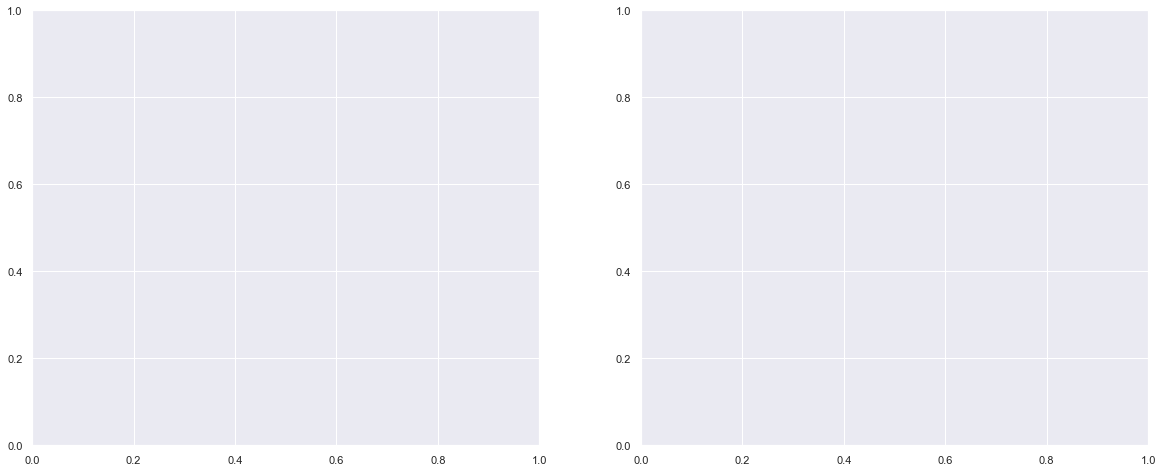

In [10]:
def show_double_plot(col, title, xlabel, bins, percentiles):
    
    fig, axes = plt.subplots(1,2, figsize=(20,8))
    
    local_temp = local[[col]+['A00001_001']]
    not_local_temp = not_local[[col]+['A00001_001']]
    
    n_local     = len(local_temp)
    n_not_local = len(not_local_temp)
    
    bins=np.histogram(np.hstack((local_temp[col], not_local_temp[col])), bins=bins)[1]
    
    axes[0].hist(local_temp[col], bins = bins, weights=(local_temp['A00001_001']/local_temp['A00001_001'].sum()), figure=fig)
    axes[1].hist(not_local_temp[col], bins = bins, weights=(not_local_temp['A00001_001']/not_local_temp['A00001_001'].sum()), figure=fig)
    
    a = axes[0].get_ylim()
    b = axes[1].get_ylim()
    
    axes[0].set_ylim(bottom=0, top=max(a[1],b[1]))
    axes[1].set_ylim(bottom=0, top=max(a[1],b[1]))

    a = axes[0].get_xlim()
    b = axes[1].get_xlim()

    axes[0].set_xlim(-0.05*max(a[1],b[1]), max(a[1],b[1]))
    axes[1].set_xlim(-0.05*max(a[1],b[1]), max(a[1],b[1]))

    fig.suptitle(title, fontsize=20)

    axes[0].set_title('Blocks with local ISPs, n = '+ str(n_local), fontsize=18)
    axes[1].set_title('Blocks without local ISPs, n = '+ str(n_not_local), fontsize=18)
    
    axes[0].set_ylabel('Share of block groups (local)', fontsize=16)
    axes[1].set_ylabel('Share of block groups (not local)', fontsize=16)
    
    axes[0].set_xlabel(xlabel, fontsize=16)
    axes[1].set_xlabel(xlabel, fontsize=16)
    
    plt.show()
    fig.savefig("C:/Users/jongo/Documents/College/Class/GRIDS/Microtelcos/figures/histograms/with_outliers/" 
                + title +' with_outliers.png')
    plt.close()
    
    if percentiles is None:
        return
       
    local_temp     = local[[col]+['A00001_001']]
    not_local_temp = not_local[[col]+['A00001_001']]
    
    # plot the histograms after removing outliers based on percentiles provided by user
    quant_df = local_temp.quantile([percentiles[0], percentiles[1]])
    low  = quant_df.loc[percentiles[0], col]
    high = quant_df.loc[percentiles[1], col]
    local_temp = local_temp[(local_temp[col]>=low) & (local_temp[col]<=high)]
    
    quant_df = not_local_temp.quantile([percentiles[0], percentiles[1]])
    low  = quant_df.loc[percentiles[0], col]
    high = quant_df.loc[percentiles[1], col]
    not_local_temp = not_local_temp[(not_local_temp[col]>=low) & (not_local_temp[col]<=high)]
    
    title += ', ' + str(percentiles[0]*100)+'% - '+ str(percentiles[1]*100)+'% percentile'
    
    fig, axes = plt.subplots(1,2, figsize=(20,8))
    
    n_local     = len(local_temp)
    n_not_local = len(not_local_temp)
    
    # ensure bin widths are equal between graphs
    bins=np.histogram(np.hstack((local_temp[col], not_local_temp[col])), bins=bins)[1]
    
    axes[0].hist(local_temp[col], bins = bins, weights=(local_temp['A00001_001']/local_temp['A00001_001'].sum()), figure=fig)
    axes[1].hist(not_local_temp[col], bins = bins, weights=(not_local_temp['A00001_001']/not_local_temp['A00001_001'].sum()), figure=fig)
    
    a = axes[0].get_ylim()
    b = axes[1].get_ylim()
    
    axes[0].set_ylim(bottom=0, top=max(a[1],b[1]))
    axes[1].set_ylim(bottom=0, top=max(a[1],b[1]))

    a = axes[0].get_xlim()
    b = axes[1].get_xlim()

    axes[0].set_xlim(min(a[0],b[0]), max(a[1],b[1]))
    axes[1].set_xlim(min(a[0],b[0]), max(a[1],b[1]))
    
    fig.suptitle(title, fontsize=20)

    axes[0].set_title('Blocks with local ISPs, n = '+ str(n_local), fontsize=18)
    axes[1].set_title('Blocks without local ISPs, n = '+ str(n_not_local), fontsize=18)
    
    axes[0].set_ylabel('Share of block groups (local)', fontsize=16)
    axes[1].set_ylabel('Share of block groups (not local)', fontsize=16)
    
    axes[0].set_xlabel(xlabel, fontsize=16)
    axes[1].set_xlabel(xlabel, fontsize=16)
    
    plt.show()
    
    fig.savefig("C:/Users/jongo/Documents/College/Class/GRIDS/Microtelcos/figures/histograms/without_outliers/" 
                + title + ', ' + str(int(percentiles[0]*100))+'_' + str(int(percentiles[1]*100)) + '_percentile.png')

default_percentiles = [0.0,0.98]
reverse_percentiles = [0.02,1.0]
both_percentiles    = [0.02,0.98]

show_double_plot('served', 'CPUC Percentage of population with access to internet per Block Group', '% with access to internet',20, None)
show_double_plot('served25', 'CPUC Percentage of population with access to 25_3 internet per Block Group', '% with access to 25/3 internet',20, None)
show_double_plot('served100', 'CPUC Percentage of population with access to 100_10 internet per Block Group', '% with access to 100/10 internet',20, None)
show_double_plot('served_fib', 'CPUC Percentage of population with access to fiber internet per Block Group', '% with access to fiber internet',20, None)

show_double_plot('comp', 'CPUC Percentage of companies with access to internet per Block Group', '% with access to internet',20, None)
show_double_plot('comp25', 'CPUC Percentage of companies with access to 25_3 internet per Block Group', '% with access to 25/3 internet',20, None)
show_double_plot('comp100', 'CPUC Percentage of companies with access to 100_10 internet per Block Group', '% with access to 100/10 internet',20, None)
show_double_plot('comp_fib', 'CPUC Percentage of companies with access to fiber internet per Block Group', '% with access to fiber internet',20, None)

show_double_plot('max_up', 'CPUC Absolute max upload speed per block group', 'max upload speed',20, default_percentiles)
show_double_plot('max_dn', 'CPUC Absolute max download speed per block group', 'max download speed',20, default_percentiles)

show_double_plot('avg_max_up', 'CPUC Average max upload speed per block group, weighted by block population', 'average upload speed',20, default_percentiles)
show_double_plot('avg_max_dn', 'CPUC Average max download speed per block group, weighted by block population', 'average download speed',20, default_percentiles)

#show_double_plot('A00001_001', 'Total Population per Block Group', 'population',20, default_percentiles)
#show_double_plot('A00002_002', 'Population Density (pop per sqmi) per Block Group', 'population density',20, default_percentiles)
show_double_plot('A00002_003', 'Land area (sqmi) per Block Group', 'land area',20, default_percentiles)
show_double_plot('A10003_001', 'Average Household size per Block Group', 'avg household size',20, None)
show_double_plot('A14006_001', 'Median Household income per Block Group', 'median income',20, default_percentiles)
show_double_plot('A14008_001', 'Average Household income per Block Group', 'average income',20, default_percentiles)
show_double_plot('A10036_001', 'Median House Value per Block Group', 'house value',20, default_percentiles)

show_double_plot('white', 'Percentage of White People per Block Group', '% white people',20, None)
show_double_plot('black', 'Percentage of Black People per Block Group', '% black people',10, default_percentiles)
show_double_plot('amindian', 'Percentage of Native American People per Block Group', '% aminidian people',10, default_percentiles)
show_double_plot('asian', 'Percentage of Asian People per Block Group', '% asian people', 10, default_percentiles)
show_double_plot('hispanic', 'Percentage of Hispanic People per Block Group', '% hispanic people',20, None)

show_double_plot('laborforce16', 'Laborforce participation rate (16+) per Block Group', 'laborforce patricipation rate',20, both_percentiles)
show_double_plot('unemployed', 'Unemployment rate per Block Group', 'unemployment rate',20, default_percentiles)
show_double_plot('povertyrate', 'Poverty Rate per Block Group', 'poverty rate',20, default_percentiles)
show_double_plot('lessHS', 'Percentage of population with less than high school education per Block Group', 'lessHS rate',20, default_percentiles)
show_double_plot('bachelor_more', 'Percentage of population with a Bachelor or higher per Block Group', 'bachelor rate',20, default_percentiles)

show_double_plot('nointernet', 'ACS Percentage of population with no access to internet per Block Group', 'nointernet rate',20, default_percentiles)
show_double_plot('has_pc', 'ACS Percentage of population that owns a PC per Block Group', 'pc rate',20, reverse_percentiles)
show_double_plot('has_pcandbroadband', 'ACS Percentage of population with a PC and broadband internet per Block Group', 'PCandBroadband rate',20, reverse_percentiles)
show_double_plot('has_internet', 'ACS Percentage of population with any internet access per Block Group', 'internet rate',20, reverse_percentiles)
show_double_plot('has_broadband', 'ACS Percentage of population with broadband internet per Block Group', 'broadband rate',20, reverse_percentiles)
show_double_plot('has_mobileonly', 'ACS Percentage of population with mobile only internet access per Block Group', 'mobile only rate',20, default_percentiles)
show_double_plot('has_cabledslfib', 'ACS Percentage of population with fixed internet per Block Group', 'fixed internet rate',20, None)

show_double_plot('tri', 'Terrain Ruggedness Index (TRI) per Block Group', 'TRI',20, default_percentiles)
show_double_plot('urban_index', 'Urban Index per Block Group', 'urban index', 4, None)

show_double_plot('avg_u_kbps_wt', 'Ookla Average max upload speed (kbps) per block group, weighted by block population', 'average upload speed',20, default_percentiles)
show_double_plot('avg_d_kbps_wt', 'Ookla Average max download speed (kpbs) per block group, weighted by block population', 'average download speed',20, default_percentiles)
show_double_plot('avg_lat_ms_wt', 'Ookla Average latency (ms) per block group, weighted by block population', 'average latency',20, default_percentiles)

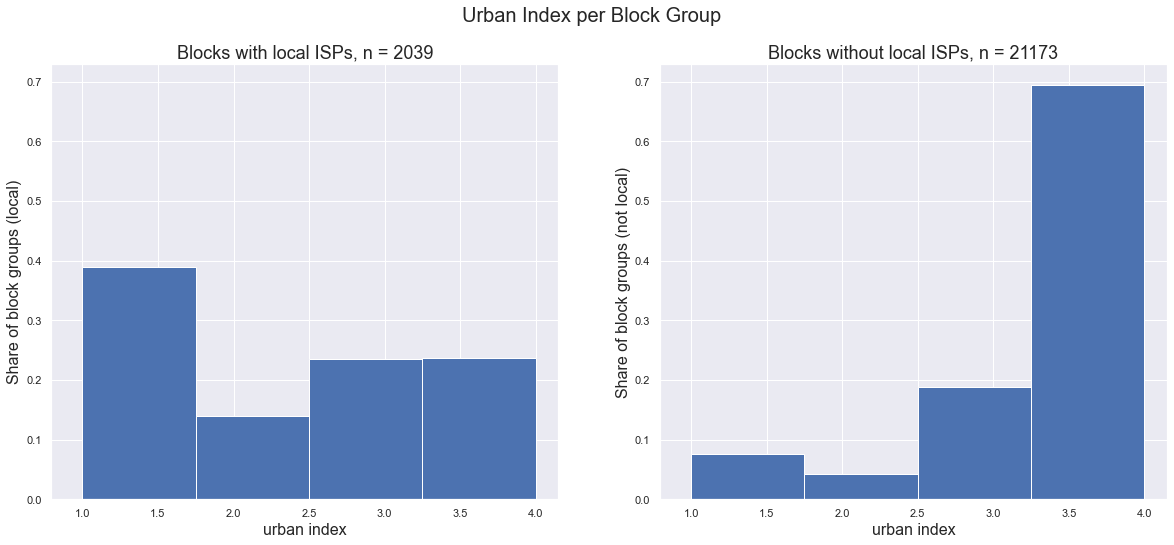

In [17]:
show_double_plot('urban_index', 'Urban Index per Block Group', 'urban index', 4, None)